In [32]:
using Plots
using Metaheuristics
gr()

Plots.GRBackend()

## Ejemplo 1

Considere:
$$
f(x) = \sum_{i=1}^n x_i^2
$$

¿Qué propiedades tiene?

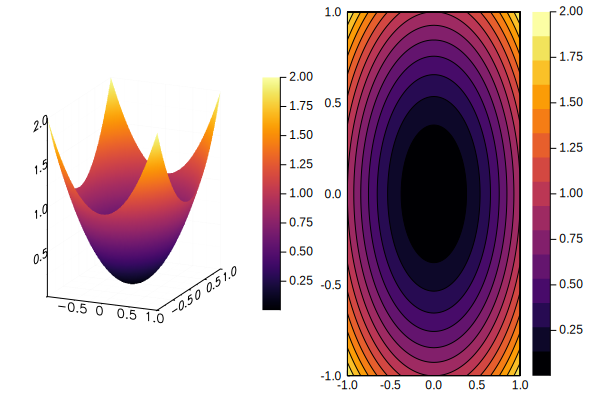

In [33]:
f(x⃗) = sum(x⃗.^2)

f(x, y) = f(Float64[x,y])

X = Y = range(-1, 1, length=100)
l = @layout [a b] 
plot(X, Y, f, lt=[:surface, :contourf], layout=l)

## Ejemplo 2

Considere:
$$
    f(x) = 10n + \sum_{i=1}^n x_i^2 + 10\cos(2\pi x_i)
$$
¿Qué propiedades tiene?

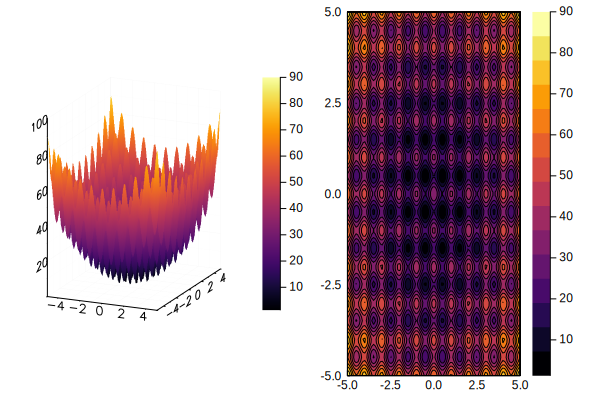

In [34]:
f(x⃗) = 10length(x⃗) + sum(x⃗.^2 + 10cos.(2π*x⃗))

f(x, y) = f(Float64[x,y])

X = Y = range(-5, 5, length=100)

l = @layout [a b] 
plot(X, Y, f, lt=[:surface, :contourf], layout=l)

## Minimizando Ejemplo 1

Minimizar usando ED:
$$
f(x) = \sum_{i=1}^n x_i^2,
$$
donde
$$
x\in [-5, 5]^n
$$

In [35]:
# función objetivo
f(x⃗) = sum(x⃗.^2)

limites = [
    -5  -5
     5  5.0
]

# dimensión del problema
n = size(limites, 2)

# optimizando con Evolución diferencial
x, f_x = DE(f, n, limits = limites)

============[ ED results ]=============
| Generations = 999
| Evals       = 20000
| best sol.   = 0.0


([0.0, 0.0], 0.0)

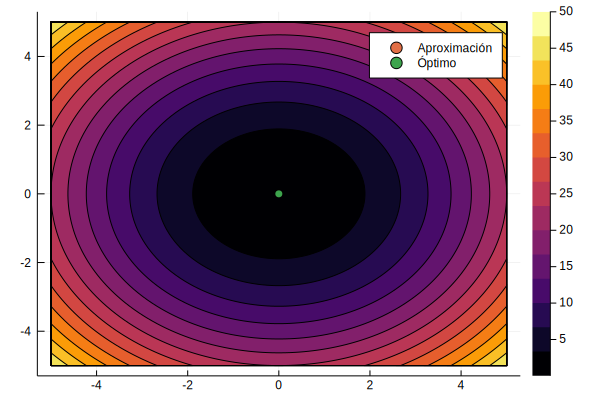

In [36]:
X = range(-5, 5, length=100)
Y = range(-5, 5, length=100)
contourf(X, Y, f)

scatter!([x[1]], [x[2]], label="Aproximación")
scatter!([0.0], [0.0], label="Óptimo")

## Minimizando Ejemplo 2

Minimizar usando DE:
$$
    f(x) = 10n + \sum_{i=1}^n x_i^2 + 10\cos(2\pi x_i)
$$
donde
$$
x\in [-5, 5]^n
$$

In [37]:
f(x⃗) = 10length(x⃗) + sum(x⃗.^2 - 10cos.(2π*x⃗))

limites = [
    -5  -5
     5  5.0
]

n = size(limites, 2)

x, f_x = DE(f, n, limits = limites)

============[ ED results ]=============
| Generations = 999
| Evals       = 20000
| best sol.   = 0.0


([5.44161e-10, -3.30174e-9], 0.0)

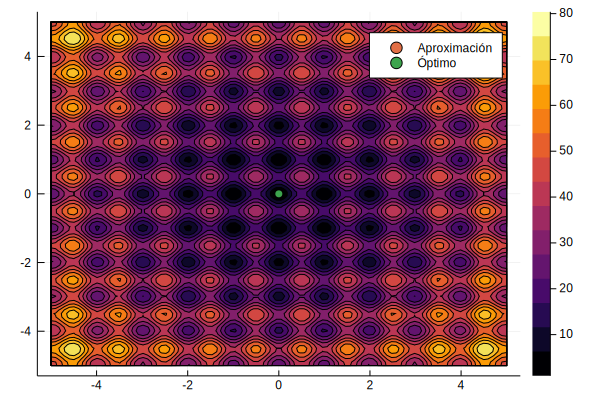

In [38]:
X = range(-5, 5, length=100)
Y = range(-5, 5, length=100)
contourf(X, Y, f)

scatter!([x[1]], [x[2]], label="Aproximación")
scatter!([0.0], [0.0], label="Óptimo")

## PSO

In [39]:
f(x⃗) = sum(x⃗.^2)
n = 10

x, f_x = pso(f, n, limits = (-5.0, 5))

============[ PSO results ]============
| Generations = 1000
| Evals.      = 100100
| best sol.   = 1.984868106059973e-15
| mean sol    = 0.0002889477701171875
| std. sol    = 0.0020231960920020736


([6.92802e-9, 1.69575e-9, 4.09971e-9, -6.33555e-9, -2.55628e-8, -6.49909e-9, -1.6401e-8, -7.28951e-9, -2.91046e-8, -3.48544e-9], 1.984868106059973e-15)

## Problema de Caja-negra

El valor óptimo de esta función es 1000, es decir, $f(x^*)=1000$.

Considere $D = 2$.

============[ ED results ]=============
| Generations = 999
| Evals       = 20000
| best sol.   = 1000.0


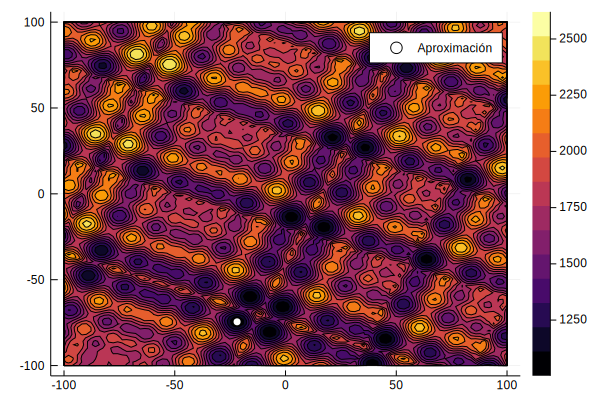

In [40]:
using CEC17

f(x) = cec17_test_func(x, 10)

D = 2
x, f_x = DE(f, D)

X = range(-100, 100, length=100)
Y = range(-100, 100, length=100)
contourf(X, Y, f)

scatter!([x[1]], [x[2]], label="Aproximación", color=:white)

### ¿Qué pasa con D=10, 30, 100? 

============[ ED results ]=============
| Generations = 999
| Evals       = 100000
| best sol.   = 2366.4618524574953


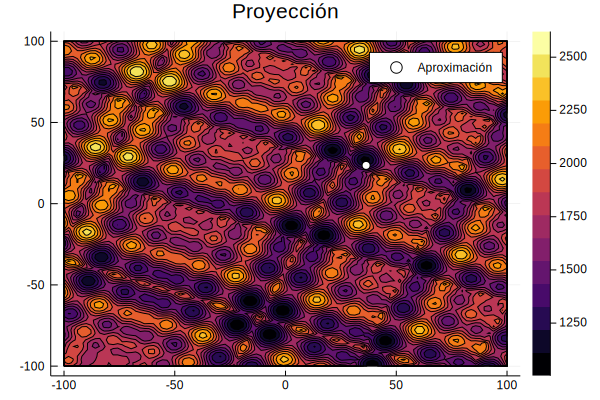

In [41]:
D = 10

x, f_x = DE(f, D)

X = range(-100, 100, length=100)
Y = range(-100, 100, length=100)

contourf(X, Y, f, title="Proyección")
scatter!([x[1]], [x[2]], label="Aproximación", color=:white)